Problem Set 3 - Extend What You Have Learned


1 - Using the Twitter REST API, collect Tweets from Boston for 30 min. Note how you set the time in the above example (in the run_all() function), it was in seconds. How would you do that here?


i) Importing libraries, preparing Keys.

In [1]:
# Import libraries
import json
import time
import threading
from datetime import datetime
from twython import Twython

# Imports the keys from the python file
from twitter_key_cnavas import api_key, api_secret


# Assigns the keys to the variables
APP_KEY = api_key
APP_SECRET = api_secret

# Create a Twython object called Twitter
# Set this up using your Twitter Keys
# Say we are going to use OAuth 2
twython_setup = Twython(APP_KEY, APP_SECRET, oauth_version=2)

# Get an OAuth2 access token, save as variable so we can launch our 
OAUTH2_ACCESS_TOKEN = twython_setup.obtain_access_token()

# Create a Twython Object we will use for our access to the API
my_twython = Twython(APP_KEY, access_token=OAUTH2_ACCESS_TOKEN)




ii) First function: get_tweets_by_location

In [15]:
# Input the search term you want to search on
search_term='' # SET A SEARCH TERM LIKE 'TRUMP'
# CAN LEAVE search_term BLANK IF YOU WANT ALL TWEETS NEAR A SPECIFIC LOCATION
# Setup a Lat Lon
latlong=[42.360107, -71.094161] # MIT coordinates
# Setup a search distance
distance='25mi'
# Set result type (can be 'recent', 'popular', or 'mixed')
type_of_result='recent'
# Set number of results (up to 100, remember you can only get 450 in 15 minutes)
number_of_tweets=15


# Fetches tweets with a given query at a given lat-long.
def get_tweets_by_location( latlong=None ):
    # Uses the search function to hit the APIs endpoints and look for recent tweets within the area
    results = my_twython.search(q=search_term, geocode=str(latlong[0])+','+str(latlong[1])+','+ distance, result_type=type_of_result, count=number_of_tweets)
    # Returns the only the statuses from the resulting JSON
    return results ['statuses']

# test run our function
get_tweets_by_location(latlong)

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Mar 08 23:27:46 +0000 2017',
  'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 839618678551347200,
  'id_str': '839618678551347200',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'place': None,
  'retweet_count': 0,
  'retweeted': False,
  'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
  'text': 'Woburn scores. WA down 0-1 with 4 mins left in the 1st period',
  'truncated': False,
  'user': {'contributors_enabled': False,
   'created_at': 'Wed Sep 30 23:24:35 +0000 2009',
   'default_profile': True,
   'default_profile_image': False,
   'de

ii) Second function: get_lots_of_tweets

In [16]:
# Does pretty much what its long name suggests.
def get_lots_of_tweets( latlong ):
    # Create a dictionary to parse the JSON
    all_tweets = {}
    
    # We will be hitting the API a number of times within the total time
    total_time = 120
    
    # Everytime we hit the API we subtract time from the total
    remaining_seconds = total_time
    interval = 60
    while remaining_seconds > 0: # loop and run the function while remaining seconds is greater than zero
        added = 0
        # Hit the Twitter API using our function
        new_tweets = get_tweets_by_location(latlong) # we set latlong above!
        # Parse the resulting JSON, and save the rest of the raw content
        for tweet in new_tweets:
            tid = tweet['id']
            if tid not in all_tweets:
                properties = {}
                if tweet['coordinates'] != None:
                    properties['lat'] = tweet['coordinates']['coordinates'][0]
                    properties['lon'] = tweet['coordinates']['coordinates'][1]
                else:
                    properties['lat'] = None
                    properties['lon'] = None
                properties['location'] = tweet['user']['location'] #This will get us the location associated with the profile
                properties['tweet_id'] = tid
                properties['content'] = tweet['text']
                properties['user'] = tweet['user']['id']
                properties['raw_source'] = tweet
                properties['data_point'] = 'none'
                properties['time'] = tweet['created_at']
                all_tweets[ tid ] = properties
                added += 1
        print("At %d seconds, added %d new tweets, for a total of %d" % ( total_time - remaining_seconds, added, len( all_tweets )))
        # We wait a few seconds and hit the API again
        time.sleep(interval)
        remaining_seconds -= interval
    print(str(len(all_tweets)) + ' Tweets retrieved.')
    # We return the final dictionary to work with in Python
    return all_tweets

iii) Run function

In [17]:
# This function executes the the functions over a given period of time
def run_all():
    # This is the number of times the code will be executed. In this case, just once. 
    starting = 1
    while starting > 0:
        # Sometimes the API returns some errors, killing the whole script, so we setup try/except to make sure it keeps running
        try:
            t = get_lots_of_tweets( latlong )
            # We name every file with the current time
            timestr = time.strftime("%Y%m%d-%H%M%S")
            # We write a new JSON into the target path
            with open( 'data3/' + '  %stweets.json' %(timestr), 'w' ) as f:
                f.write(json.dumps(t))
            # we can use a library like threading to execute the run function continuously.
            #threading.Timer(10, run_all).start()
            starting -= 1
            print(starting)
        except:
            pass
    

In [ ]:
iv) iterative process

In [18]:
import time
t_end = time.time() + 60 * 30
while time.time() < t_end:
    run_all()

At 0 seconds, added 15 new tweets, for a total of 15
At 60 seconds, added 15 new tweets, for a total of 30
30 Tweets retrieved.
0
At 0 seconds, added 15 new tweets, for a total of 15
At 60 seconds, added 15 new tweets, for a total of 30
30 Tweets retrieved.
0
At 0 seconds, added 15 new tweets, for a total of 15
At 60 seconds, added 13 new tweets, for a total of 28
28 Tweets retrieved.
0
At 0 seconds, added 15 new tweets, for a total of 15
At 60 seconds, added 15 new tweets, for a total of 30
30 Tweets retrieved.
0
At 0 seconds, added 15 new tweets, for a total of 15
At 60 seconds, added 15 new tweets, for a total of 30
30 Tweets retrieved.
0
At 0 seconds, added 15 new tweets, for a total of 15
At 60 seconds, added 15 new tweets, for a total of 30
30 Tweets retrieved.
0
At 0 seconds, added 15 new tweets, for a total of 15
At 60 seconds, added 15 new tweets, for a total of 30
30 Tweets retrieved.
0
At 0 seconds, added 15 new tweets, for a total of 15
At 60 seconds, added 15 new tweets, f

2 - Create a Pie Chart showing a summary of tweets by user location. Please clean up the data so that multiple variations of the same location name are replaced with one variation.

i) Libraries to work with data

In [19]:
# Import some additional libraries that will allow us to plot and interact with the operating system
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ii)Get data colected from archives

In [30]:
# Get the file names from a given directory
file_dir = "data3" # Set this to where your JSON saved
# Get only the JSONs we have saved
onlyfiles = [ f for f in listdir(file_dir) if isfile(join(file_dir,f)) and not f.startswith('.')]

# create an empty dataframe with columns for each property
df_tweets3 = pd.DataFrame(columns = ['tweet_id', 'lat', 'lon', 'content','location','user','raw_source','data_point','time'])

# Loop through all the files
for file in onlyfiles:
    full_dir = join(file_dir,file) 
    with open(full_dir) as json_data:
        dict = json.load(json_data) # creates a Python dictionary of our json
        if not isinstance(dict, list):
            for key, val in dict.items():
                df_tweets3.loc[key,val] = val
                

df_tweets3.location.unique()
#df_tweets3.location.unique()


array(['Westford, MA', 'Boston', '', 'Boston, MA', 'France',
       'United States', 'Marblehead, MA', 'Dubai', 'Everett, MA', 'USA ',
       'Boston, Massachusetts', 'Boston, Ma', 'Reeferside', '330',
       'Lynn Classical High School', 'Holbrook, MA', 'boston', 'All over',
       'Reading, MA', 'Boston Ma', ' Boston', 'Headquarters: Boston, MA',
       'Illinois ', 'BOSTON, MA   USA', 'Lowell, MA', 'Panamá',
       'Warren, RI', 'Cambridge, MA',
       'Massachusetts Institute of Technology, Cambridge', 'Foxboro, MA',
       'Wrentham, MA', 'Catania, Italia', 'Stoneham, MA',
       'Boston, MA, USA', 'Stoughton, MA', 'New Jersey / Boston',
       'Comodoro Rivadavia, Argentina', 'Wellesley, MA', 'The PNW',
       'Tewksbury, MA', 'New england', 'Queens, NY', 'New England USA',
       'Hyde Park, Boston', 'San Francisco, CA', 'Hopkinton, MA',
       'NoCali, USA', 'Framingham, MA fishing or some', 'Waltham, MA',
       'Massachusetts', 'Brockton,Ma', 'Fenway Park', 'Somerville, MA',


iii) clean up the data so that multiple variations of the same location

In [37]:
# List of variations of Boston and Cambridge and clean some data


df_tweets3['new_location'] = df_tweets3['location'].replace('^.*[Bb]oston.*$', 'Boston, MA', regex=True)
df_tweets3['new_location1'] = df_tweets3['new_location'].replace('^.*[Cc]ambridge.*$', 'Cambridge, MA', regex=True)
df_tweets3['new_location2'] = df_tweets3['new_location1'].replace('^.*BOSTON.*$', 'Boston, MA', regex=True)
df_tweets3['new_location3'] = df_tweets3['new_location2'].replace('^.*USA.*$', 'United States', regex=True) 
df_tweets3.new_location3.unique()
    



array(['Westford, MA', 'Boston, MA', '', 'France', 'United States',
       'Marblehead, MA', 'Dubai', 'Everett, MA', 'Reeferside', '330',
       'Lynn Classical High School', 'Holbrook, MA', 'All over',
       'Reading, MA', 'Illinois ', 'Lowell, MA', 'Panamá', 'Warren, RI',
       'Cambridge, MA', 'Foxboro, MA', 'Wrentham, MA', 'Catania, Italia',
       'Stoneham, MA', 'Stoughton, MA', 'Comodoro Rivadavia, Argentina',
       'Wellesley, MA', 'The PNW', 'Tewksbury, MA', 'New england',
       'Queens, NY', 'San Francisco, CA', 'Hopkinton, MA',
       'Framingham, MA fishing or some', 'Waltham, MA', 'Massachusetts',
       'Brockton,Ma', 'Fenway Park', 'Somerville, MA', 'Danvers, MA',
       'Beverly, MA', 'Conte Forum ', 'Peabody, MA', 'Woburn, MA',
       'Columbus, GA', 'AZ', 'New York City', 'Dallas, TX',
       'Dedham, Massachusetts', 'London, Ontario', 'California ',
       'Go Reds! Smash State!', 'Albania', 'North Andover, MA',
       'Arlington, MA', 'Newton, MA', 'Lynn', 'Vene

In [ ]:
iv) Plot Pie Chart

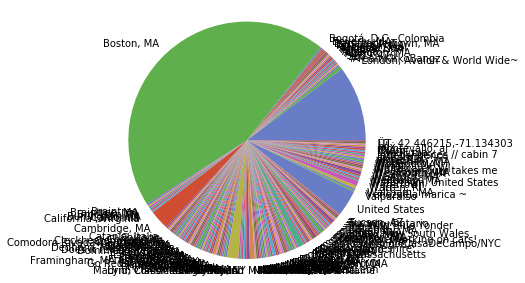

In [38]:
grouped_tweets = df_tweets3.groupby('new_location3')
count_tweets = grouped_tweets['new_location3'].count()
df_count_tweets = count_tweets.to_frame()
df_count_tweets.columns = ['Count']
df_count_tweets.index.names = ['new_Location3']
df_count_tweets.sort_index()

# Create a list of colors (from iWantHue)
colors = ["#697dc6","#5faf4c","#7969de","#b5b246",
          "#cc54bc","#4bad89","#d84577","#4eacd7",
          "#cf4e33","#894ea8","#cf8c42","#d58cc9",
          "#737632","#9f4b75","#c36960"]

# Create a pie chart
plt.pie( df_count_tweets['Count'], labels=df_count_tweets.index.get_values(), shadow=False, colors=colors)

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()


3 - Create a Scatterplot showing all of the tweets that had a latitude and longitude.

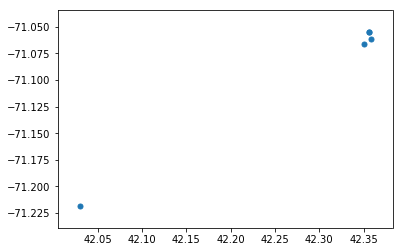

In [27]:
# Create a filter from df_tweets filtering only those that have values for lat and lon
df_tweets_with_location = df_tweets3[df_tweets3.lon.notnull() & df_tweets3.lat.notnull()]
df_tweets_with_location

# Use a scatter plot to make a quick visualization of the data points
# NOTE: WHEN I DID THIS, I ONLY HAD SIX OUT OF ABOUT 100 TWEETS!
plt.scatter(df_tweets_with_location['lon'],df_tweets_with_location['lat'], s=25)
plt.show()




4 - Pick a search term, such as Trump or #Trump and collect 15 minutes of tweets on it. Use the same lat/lon for Boston as you used above.

i) search

In [2]:
# Input the search term you want to search on
search_term='Obama' # SET A SEARCH TERM LIKE 'TRUMP'
# CAN LEAVE search_term BLANK IF YOU WANT ALL TWEETS NEAR A SPECIFIC LOCATION
# Setup a Lat Lon
latlong=[42.360107, -71.094161] # MIT coordinates
# Setup a search distance
distance='25mi'
# Set result type (can be 'recent', 'popular', or 'mixed')
type_of_result='recent'
# Set number of results (up to 100, remember you can only get 450 in 15 minutes)
number_of_tweets=20


# Fetches tweets with a given query at a given lat-long.
def get_tweets_by_location( latlong=None ):
    # Uses the search function to hit the APIs endpoints and look for recent tweets within the area
    results = my_twython.search(q=search_term, geocode=str(latlong[0])+','+str(latlong[1])+','+ distance, result_type=type_of_result, count=number_of_tweets)
    # Returns the only the statuses from the resulting JSON
    return results ['statuses']

# test run our function
get_tweets_by_location(latlong)

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Mar 08 22:52:04 +0000 2017',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 714871998,
     'id_str': '714871998',
     'indices': [0, 13],
     'name': 'Il Volo❤Is The Best',
     'screen_name': 'CharaCarbone'},
    {'id': 25073877,
     'id_str': '25073877',
     'indices': [14, 30],
     'name': 'Donald J. Trump',
     'screen_name': 'realDonaldTrump'},
    {'id': 216881337,
     'id_str': '216881337',
     'indices': [31, 40],
     'name': 'Senator Rand Paul',
     'screen_name': 'RandPaul'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 839609693643264000,
  'id_str': '839609693643264000',
  'in_reply_to_screen_name': 'CharaCarbone',
  'in_reply_to_status_id': 839607281675350016,
  'in_reply_to_status_id_str': '839607281675350016',
  'in_reply_to_user_id': 714871998,
  'in_reply_to_user_id_str': '714871998',
  'is_quote_status': False,
  'lang': 

ii) lots of tweets

In [3]:
# Does pretty much what its long name suggests.
def get_lots_of_tweets( latlong ):
    # Create a dictionary to parse the JSON
    all_tweets = {}
    
    # We will be hitting the API a number of times within the total time
    total_time = 120
    
    # Everytime we hit the API we subtract time from the total
    remaining_seconds = total_time
    interval = 60
    while remaining_seconds > 0: # loop and run the function while remaining seconds is greater than zero
        added = 0
        # Hit the Twitter API using our function
        new_tweets = get_tweets_by_location(latlong) # we set latlong above!
        # Parse the resulting JSON, and save the rest of the raw content
        for tweet in new_tweets:
            tid = tweet['id']
            if tid not in all_tweets:
                properties = {}
                if tweet['coordinates'] != None:
                    properties['lat'] = tweet['coordinates']['coordinates'][0]
                    properties['lon'] = tweet['coordinates']['coordinates'][1]
                else:
                    properties['lat'] = None
                    properties['lon'] = None
                properties['location'] = tweet['user']['location'] #This will get us the location associated with the profile
                properties['tweet_id'] = tid
                properties['content'] = tweet['text']
                properties['user'] = tweet['user']['id']
                properties['raw_source'] = tweet
                properties['data_point'] = 'none'
                properties['time'] = tweet['created_at']
                all_tweets[ tid ] = properties
                added += 1
        print("At %d seconds, added %d new tweets, for a total of %d" % ( total_time - remaining_seconds, added, len( all_tweets )))
        # We wait a few seconds and hit the API again
        time.sleep(interval)
        remaining_seconds -= interval
    print(str(len(all_tweets)) + ' Tweets retrieved.')
    # We return the final dictionary to work with in Python
    return all_tweets

In [ ]:
iii) run function

In [4]:
# This function executes the the functions over a given period of time
def run_all2():
    # This is the number of times the code will be executed. In this case, just once. 
    starting = 1
    while starting > 0:
        # Sometimes the API returns some errors, killing the whole script, so we setup try/except to make sure it keeps running
        try:
            t = get_lots_of_tweets( latlong )
            # We name every file with the current time
            timestr = time.strftime("%Y%m%d-%H%M%S")
            # We write a new JSON into the target path
            with open( 'data2/' + '  %stweets.json' %(timestr), 'w' ) as f:
                f.write(json.dumps(t))
            # we can use a library like threading to execute the run function continuously.
            #threading.Timer(10, run_all).start()
            starting -= 1
            print(starting)
        except:
            pass
    

iv) Iterative process

In [5]:
import time
t_end = time.time() + 60 * 15
while time.time() < t_end:
    run_all2()

At 0 seconds, added 14 new tweets, for a total of 14
At 60 seconds, added 1 new tweets, for a total of 15
15 Tweets retrieved.
0
At 0 seconds, added 13 new tweets, for a total of 13
At 60 seconds, added 0 new tweets, for a total of 13
13 Tweets retrieved.
0
At 0 seconds, added 13 new tweets, for a total of 13
At 60 seconds, added 0 new tweets, for a total of 13
13 Tweets retrieved.
0
At 0 seconds, added 14 new tweets, for a total of 14
At 60 seconds, added 1 new tweets, for a total of 15
15 Tweets retrieved.
0
At 0 seconds, added 14 new tweets, for a total of 14
At 60 seconds, added 4 new tweets, for a total of 18
18 Tweets retrieved.
0
At 0 seconds, added 16 new tweets, for a total of 16
At 60 seconds, added 0 new tweets, for a total of 16
16 Tweets retrieved.
0
At 0 seconds, added 14 new tweets, for a total of 14
At 60 seconds, added 0 new tweets, for a total of 14
14 Tweets retrieved.
0
At 0 seconds, added 12 new tweets, for a total of 12
At 60 seconds, added 0 new tweets, for a tot

v) get data from archives

In [11]:
# Import some additional libraries that will allow us to plot and interact with the operating system
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Get the file names from a given directory
file_dir = "data2" # Set this to where your JSON saved
# Get only the JSONs we have saved
onlyfiles = [ f for f in listdir(file_dir) if isfile(join(file_dir,f)) and not f.startswith('.')]

# create an empty dataframe with columns for each property
df_tweets2 = pd.DataFrame(columns = ['tweet_id', 'lat', 'lon', 'content','location','user','raw_source','data_point','time'])

# Loop through all the files
for file in onlyfiles:
    full_dir = join(file_dir,file) 
    with open(full_dir) as json_data:
        dict = json.load(json_data) # creates a Python dictionary of our json
        if not isinstance(dict, list):
            for key, val in dict.items():
                df_tweets2.loc[key,val] = val
                

df_tweets2.shape


(29, 9)

5 - Export the entirety of your scraped Twitter datasets (one with a search term, one without) to two CSV files. We will be checking this CSV file for duplicates. So clean your file.


In [39]:
# data without search term
df_tweets3.to_csv('twitter1_data.csv', sep=',', encoding='utf-8')
#'Obama' data
df_tweets2.to_csv('twitter2_data.csv', sep=',', encoding='utf-8')